# **ARTIFICIAL INTELLIGENCE**

### Predicting whether an individual in the tech industry has sought treatment for mental health issues


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Importing the dataset

In [ ]:
import requests
import pandas as pd

def download_and_load_dataset(file_url, save_path):
    # Download the file
    response = requests.get(file_url)

    # Save the downloaded file
    with open(save_path, "wb") as f:
        f.write(response.content)

    # Load the file into a pandas DataFrame
    df = pd.read_csv(save_path)  # You can use other pandas read functions for different file formats

    return df

file_url = 'https://drive.google.com/uc?export=download&id=1X7fft2NAaxj5FrAqbOE5SKntzJZSeadf'

# Replace 'downloaded_dataset.csv' with the desired file name
save_path = 'downloaded_dataset.csv'

# Download and load the dataset into a DataFrame
df = download_and_load_dataset(file_url, save_path)

In [ ]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [ ]:
print(df.shape)
print("This dataset has ", df.shape[0], " rows and ", df.shape[1], " columns.")

(1259, 27)
This dataset has  1259  rows and  27  columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## Explorartory Data Analysis (EDA)

#### About the datas

In [ ]:
dtypes = df.dtypes.value_counts()
display(dtypes)

object    26
int64      1
dtype: int64

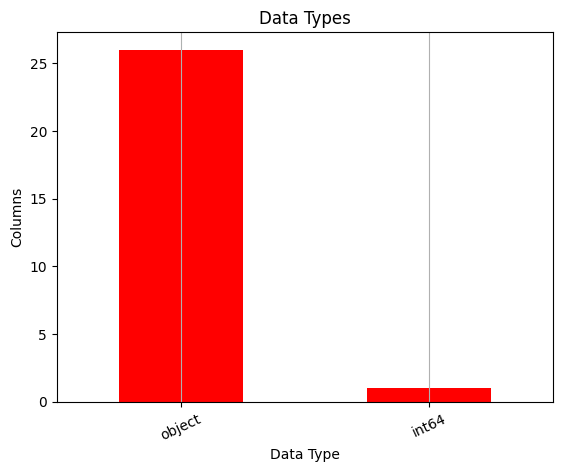

In [ ]:
dtypes.plot(kind='bar', color='red')
plt.title('Data Types')
plt.ylabel('Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=25)
plt.grid(axis='x')
plt.show()

In [ ]:
df.drop_duplicates()
df.shape

(1259, 27)

In [ ]:
#df.describe() is a method that provides a statistical summary of the numerical columns in the DataFrame
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


When analysed the age feature, it is very clear that we do have some values which are not right. If we look at the minimum value and the maximum value it says the value is -1.72 and 100,000,000,000. Maximum age and minimum age of a person who is working cannot be that values.

Keeping up the logic that the minimum age of a working person will be 18. We are taking the values from the dataset which is less that 18

In [ ]:
df[df['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


Likewise we are setting the boundary to 80 and taking the values of people whose age are above 80 in the survey

In [ ]:
df[df['Age']>80]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


We can see that there are many inconsistency in the age column.

In [ ]:
#Check our missing data from which columns and how many unique features they have.
features = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False)
features

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


0- Missing values

1- Unique Features

#### Missing values

In [ ]:
# Print total number of NaN values
print('NaN values =', df.isnull().sum().sum())
print("\n")

missing_var = []

for feature in df.columns:
    miss = df[feature].isna().sum()
    if miss > 0:
        missing_var.append(feature)
        missing_val = miss / df.shape[0]
        print('The feature {} has {} records ({:.2%}) with missing values.'.format(feature, miss, missing_val))

print('There are {} features with missing values'.format(len(missing_var)))

NaN values = 1892


The feature state has 515 records (40.91%) with missing values.
The feature self_employed has 18 records (1.43%) with missing values.
The feature work_interfere has 264 records (20.97%) with missing values.
The feature comments has 1095 records (86.97%) with missing values.
There are 4 features with missing values


In [ ]:
# Calculate the percentage of missing values for each feature
missing_percentage = df.isnull().mean() * 100

# Filter the features with more than 50% missing values
features_with_many_missing = missing_percentage[missing_percentage > 50]

# Enumerate and display each feature with its corresponding percentage of missing values
for idx, (feature, percentage) in enumerate(features_with_many_missing.items(), 1):
    print(f"{idx}. Feature {feature} is missing {percentage:.2f}% of its values")

1. Feature comments is missing 86.97% of its values


The features state, self employed, work interfere and comments has the missing values with comments being the feature with the most missing values.

In [ ]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

We have so many values in the gender feature which is not clear so we are going to change them and categorize them into three columns which is Male, female and Other for a clear analysis

In [ ]:
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
df['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [ ]:
df[df['Country'] == 'United Kingdom']['state'].value_counts().head()

Series([], Name: state, dtype: int64)

In [ ]:
df[df['Country'] == 'United States']['state'].value_counts().head()

CA    138
WA     70
NY     56
TN     45
TX     44
Name: state, dtype: int64

The method first filters a DataFrame to only reveal rows with the United States as the nation. It then counts the instances of each distinct state in the filtered data and displays the top 5 states with the highest counts.

In [ ]:
#this will give the most frequent value in the feature
df['state'].mode()

0    CA
Name: state, dtype: object

In [ ]:
#Percentage of data outside of the United States
100 * (df[df['Country'] != 'United States'].shape[0] / df.shape[0])

40.3494837172359

In [ ]:
feature = 'state'
percentage_missing = (df[feature].isnull().sum() / len(df)) * 100

print(f"The percentage of missing values in '{feature}' is: {percentage_missing:.2f}%")

The percentage of missing values in 'state' is: 40.91%


We are doing this because the maximum people in the survey are from US so if we find out the amount of people who took part in the survey are from US then the remaning people would certainly from other countries which we can keep as missing values.

In [ ]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
feature = 'self_employed'
percentage_missing = (df[feature].isnull().sum() / len(df)) * 100

print(f"The percentage of missing values in '{feature}' is: {percentage_missing:.2f}%")

The percentage of missing values in 'self_employed' is: 1.43%


In [ ]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
feature = 'work_interfere'
percentage_missing = (df[feature].isnull().sum() / len(df)) * 100

print(f"The percentage of missing values in '{feature}' is: {percentage_missing:.2f}%")

The percentage of missing values in 'work_interfere' is: 20.97%


It is clear that the missing value in the state feature is because it included only the states in the US. So the people who are from other countries had no other option but to leave out this column

Text(0.5, 1.0, 'Missing values before Imputing')

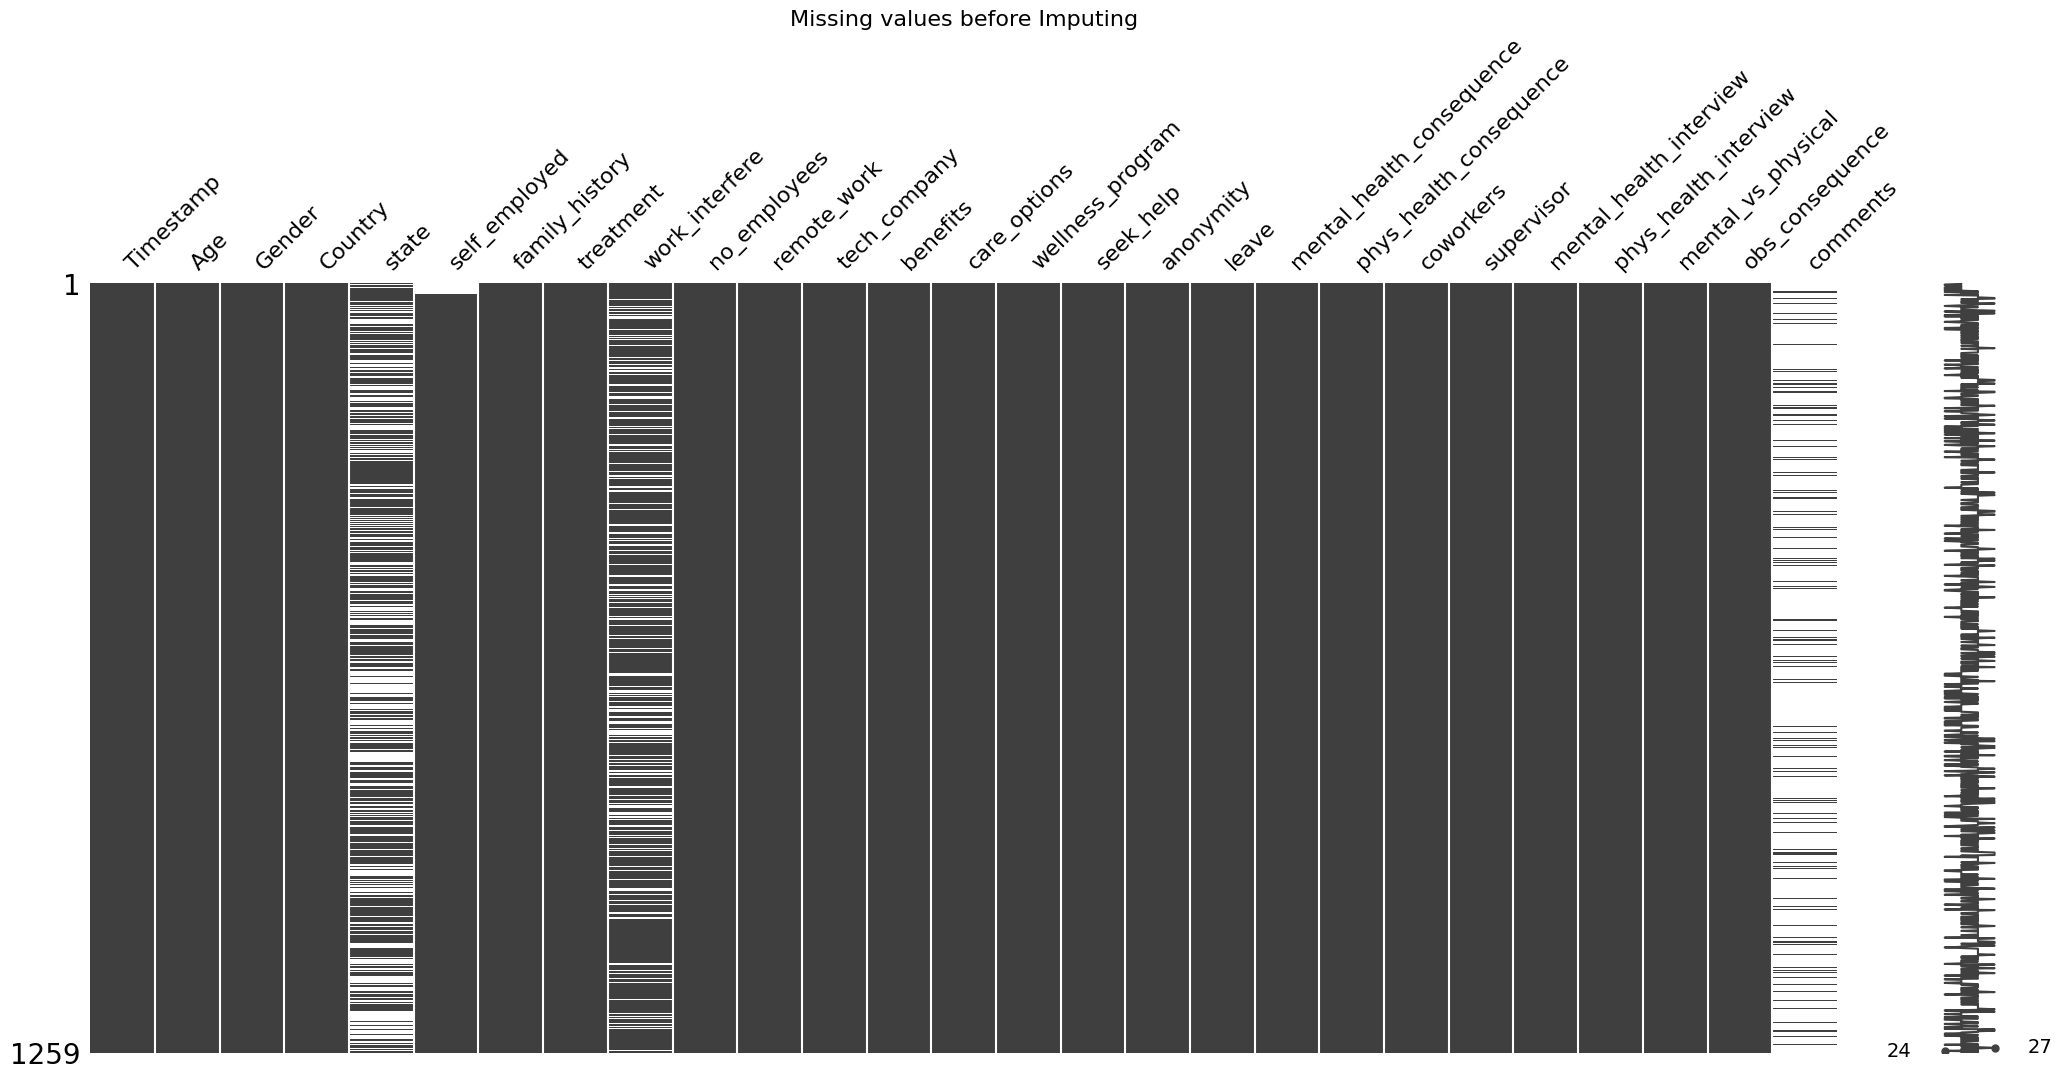

In [ ]:
%matplotlib inline
msno.matrix(df)
plt.title("Missing values before Imputing", fontsize=16)

Text(0.5, 1.0, 'Missing values before Imputing')

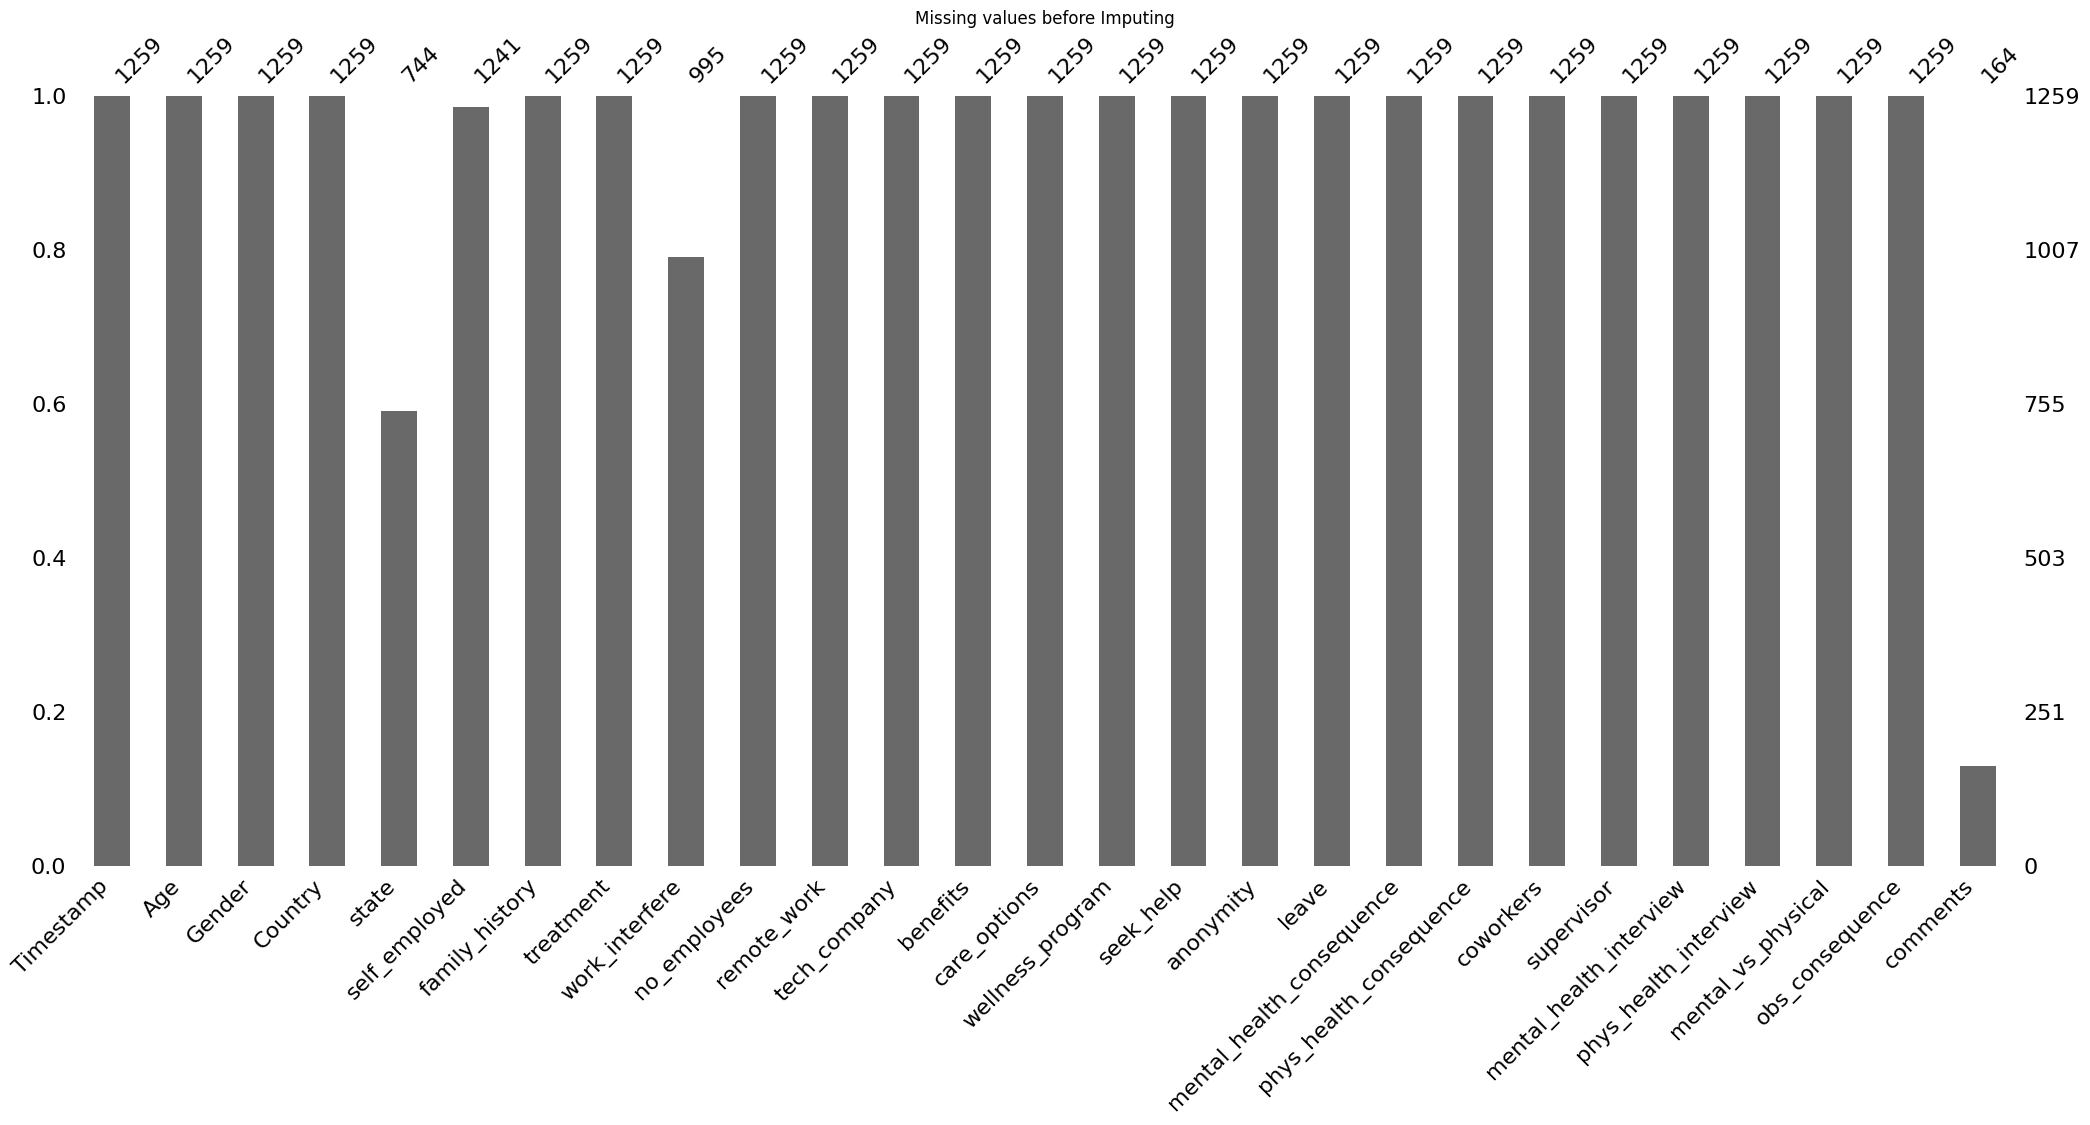

In [ ]:
msno.bar(df);
plt.title("Missing values before Imputing")

In [ ]:
features_of_interest = ['state', 'self_employed', 'work_interfere','comments']

# Create a DataFrame to display missing values for each feature
missing_values_table = pd.DataFrame({
    'Feature': features_of_interest,
    'Missing Values': [df[feature].isnull().sum() for feature in features_of_interest],
    'Percentage Missing': [(df[feature].isnull().sum() / len(df)) * 100 for feature in features_of_interest]
})

# Display the table
missing_values_table

,Feature,Missing Values,Percentage Missing
0,state,515,40.905481
1,self_employed,18,1.429706
2,work_interfere,264,20.969023
3,comments,1095,86.973789


There are many possible ways in which one can treat missing values.
1. Imputing values
2. Dropping-Deletion of rows or columns
3. Predicting missing values based on other features
4. Flagging-ntroducing a new variable to indicate a value is missing

In the above case, state feature and comments feature has many missing values then it is better to drop the features.

In the case of work_interfere and self employed we can use mode to replace the missing values with the frequently occured values in the datasets.


#**Data Pre-Processing**

First we will solve the issue in the age column where some values are not relevant to normal age of an employee

In [ ]:
#lets know what is the average age of the employees
df['Age'].median()

31.0

In [ ]:
df['Age'][df['Age'] > 75] = df['Age'].median()
df['Age'][df['Age'] < 18] = df['Age'].median()

<ipython-input-35-f4b397bf86e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'] > 75] = df['Age'].median()
<ipython-input-35-f4b397bf86e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'] < 18] = df['Age'].median()


For rows where the 'Age' value is greater than 75 and less that 18, it replaces those values with the median of the 'Age' column.

In [ ]:
df['Age'].describe()

count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

We will adress the gender column since it has many values which is hard to process and in order to make the analysis simple, the features will have only Men, Women and Trans values

In [ ]:
#unique values in the Gender field

print('Number of unique features :', df['Gender'].nunique())
print('The unique features :', set(df['Gender']))

Number of unique features : 49
The unique features : {'Genderqueer', 'm', 'Enby', 'woman', 'ostensibly male, unsure what that really means', 'fluid', 'M', 'Femake', 'something kinda male?', 'Mal', 'male', 'Trans-female', 'Male', 'F', 'Female', 'Agender', 'Make', 'femail', 'Mail', 'queer', 'female', 'Female (trans)', 'non-binary', 'Trans woman', 'Male-ish', 'f', 'Female ', 'Neuter', 'Cis Female', 'msle', 'A little about you', 'Guy (-ish) ^_^', 'Male (CIS)', 'cis male', 'Female (cis)', 'All', 'cis-female/femme', 'p', 'Nah', 'Malr', 'Cis Man', 'Cis Male', 'Woman', 'male leaning androgynous', 'Male ', 'maile', 'Man', 'Androgyne', 'queer/she/they'}


In [ ]:
df['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man", "msle", "mail", "malr", "cis man", "Cis Male",
            "cis male"]
other = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary", "nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman", "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

# Clean the 'Gender' column
df['Gender'] = df['Gender'].str.lower()
df['Gender'].replace(male_str, 'male', inplace=True)
df['Gender'].replace(female_str, 'female', inplace=True)
df['Gender'].replace(other, 'other', inplace=True)

# Remove unnecessary values
stk_list = ['a little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

# Display the unique values of the 'Gender' feature
unique_gender = df['Gender'].unique()
print(unique_gender)

['female' 'male' 'other']


Lets handle the self_employed and work_interfere which has the most missing values

In [ ]:
#finding the most frequent value in the feature
df['self_employed'].mode()[0]

'No'

In [ ]:
mode_value = df['self_employed'].mode()[0]
df.loc[df['self_employed'].isnull(), 'self_employed'] = mode_value

In [ ]:
#finding the most frequent value in the feature
df['work_interfere'].mode()[0]

'Sometimes'

In [ ]:
mode_value = df['work_interfere'].mode()[0]
df.loc[df['work_interfere'].isnull(), 'work_interfere'] = mode_value

Lets drop the state and comments feature

In [ ]:
df = df.drop(['state', 'comments'], axis=1).copy()

Lets check the missing values again

Text(0.5, 1.0, 'Missing values after Imputing')

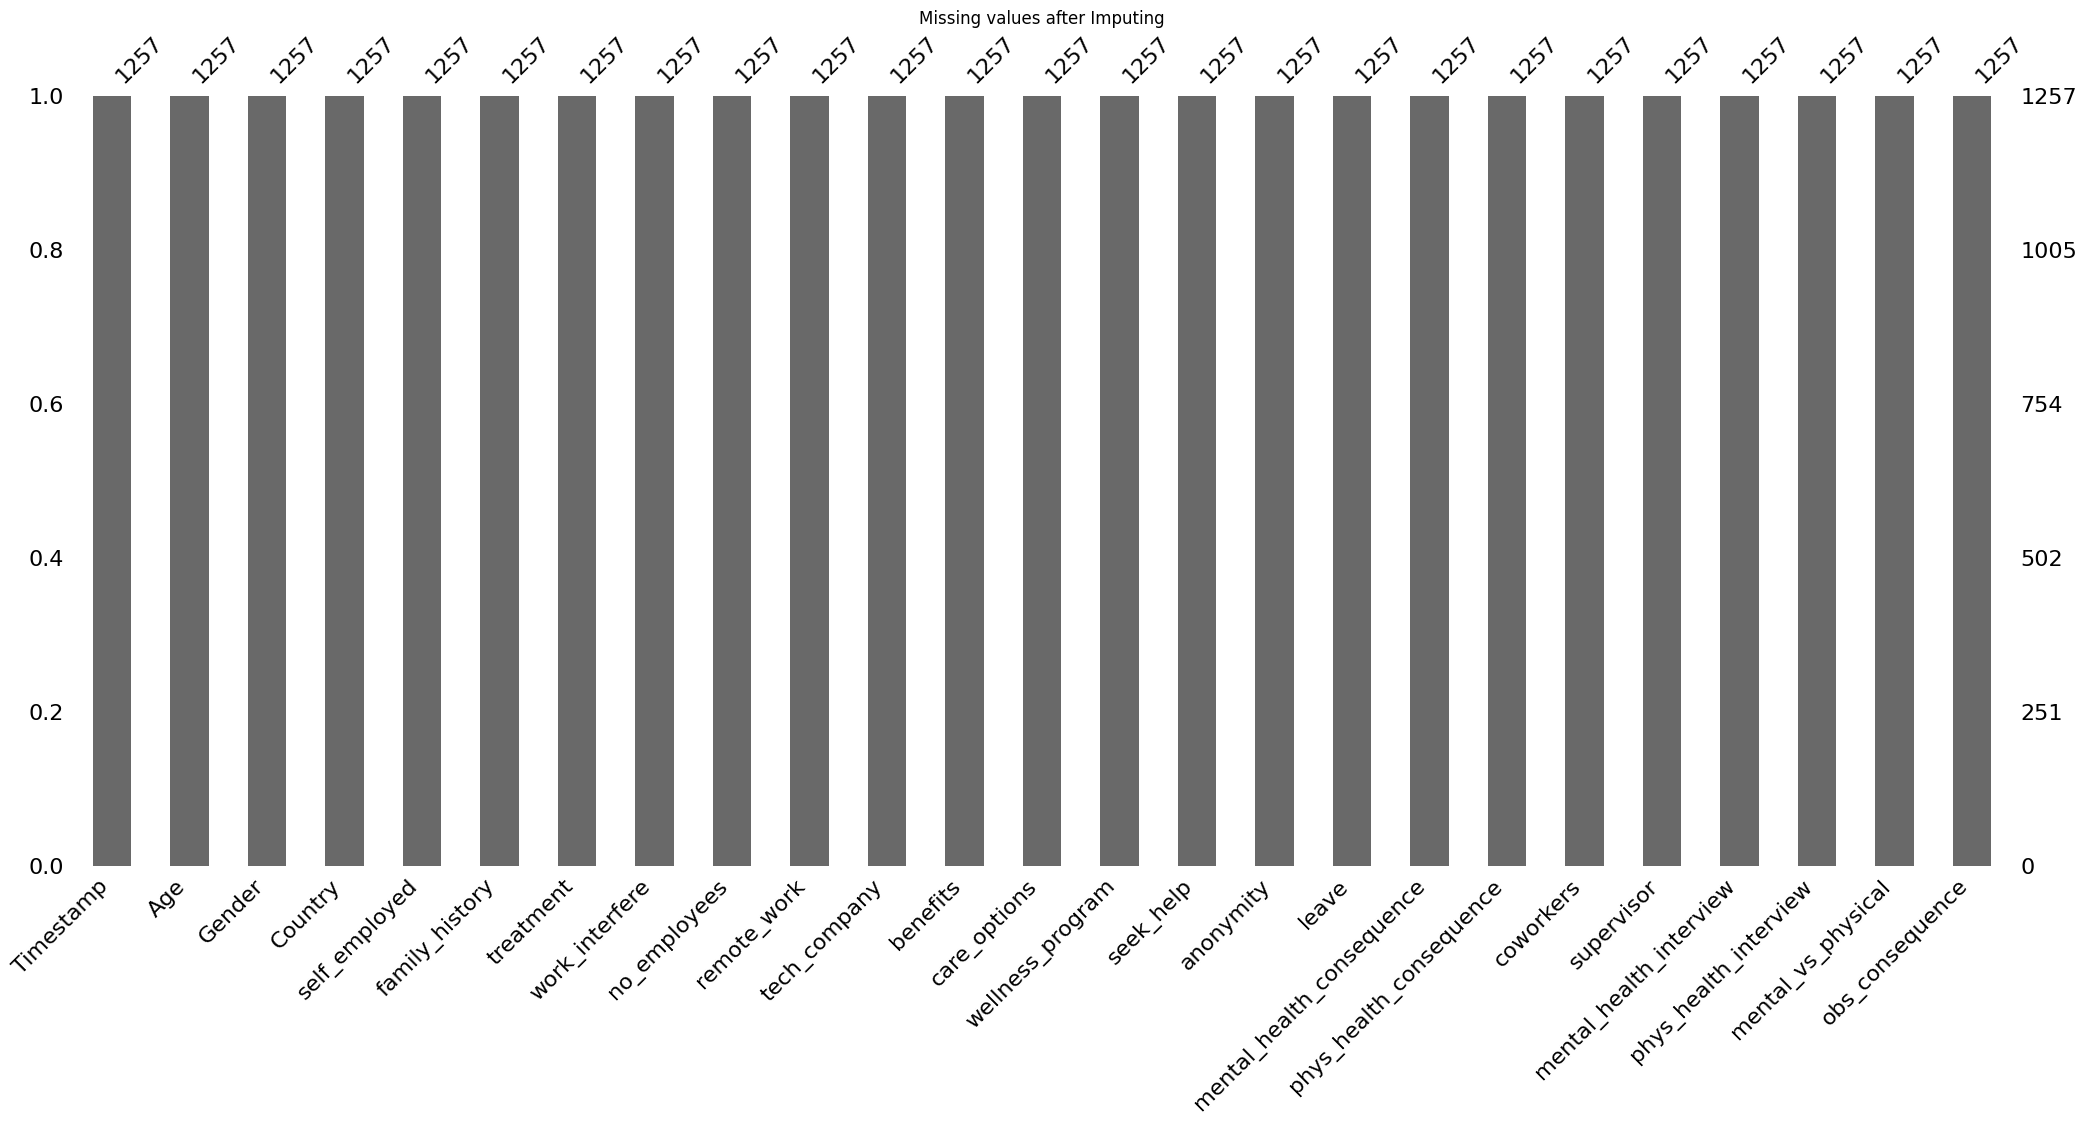

In [ ]:
msno.bar(df);
plt.title("Missing values after Imputing")

The missing value is handled

#### Finding duplicate values

In [ ]:
duplicates = df[df.duplicated(keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicate values found:")
    print(duplicates)


No duplicates found.


The datatype of timestamp is object and we will now chnage the datatype

In [ ]:
df['Timestamp'].unique()

array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
       '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
       '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1257 non-null   datetime64[ns]
 1   Age                        1257 non-null   int64         
 2   Gender                     1257 non-null   object        
 3   Country                    1257 non-null   object        
 4   self_employed              1257 non-null   object        
 5   family_history             1257 non-null   object        
 6   treatment                  1257 non-null   object        
 7   work_interfere             1257 non-null   object        
 8   no_employees               1257 non-null   object        
 9   remote_work                1257 non-null   object        
 10  tech_company               1257 non-null   object        
 11  benefits                   1257 non-null   object        
 12  care_o

# Visualizations

In [ ]:
df['treatment'].value_counts()

Yes    635
No     622
Name: treatment, dtype: int64

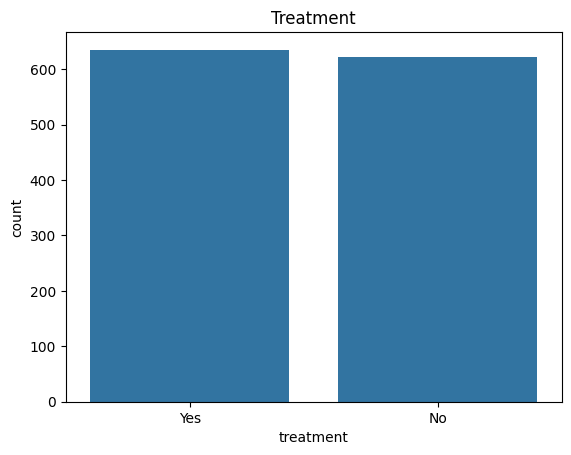

In [ ]:
#lets visualize the treatment column
sns.countplot(x='treatment', data=df)
plt.title('Treatment')
plt.show()

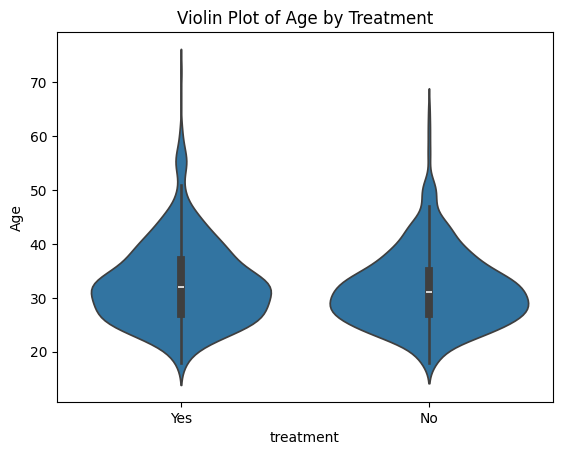

In [ ]:
#lets compare the age and treatment column
sns.violinplot(x='treatment', y='Age', data=df)
plt.title('Violin Plot of Age by Treatment')
plt.show()

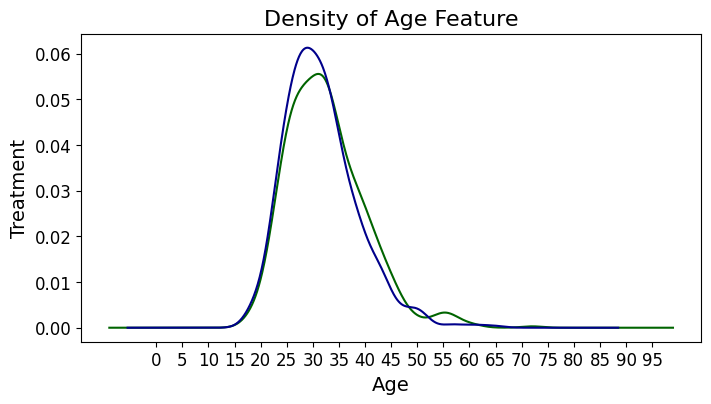

In [ ]:
figure = plt.figure(figsize=[8, 4])

df[df['treatment'] == 'Yes']['Age'].plot.kde(color='darkgreen')
df[df['treatment'] == 'No']['Age'].plot.kde(color='darkblue')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

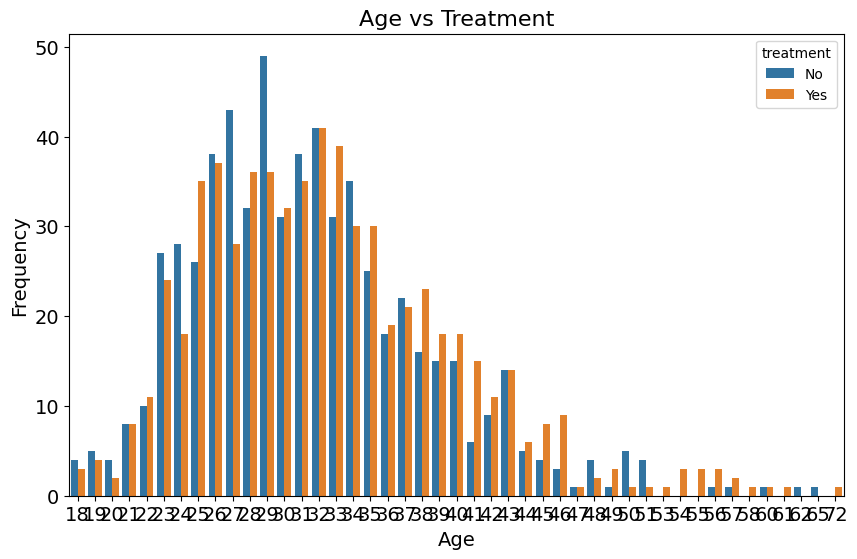

In [ ]:
fig = plt.figure(figsize=(10, 6))

sns.countplot(x='Age', hue='treatment', data=df)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

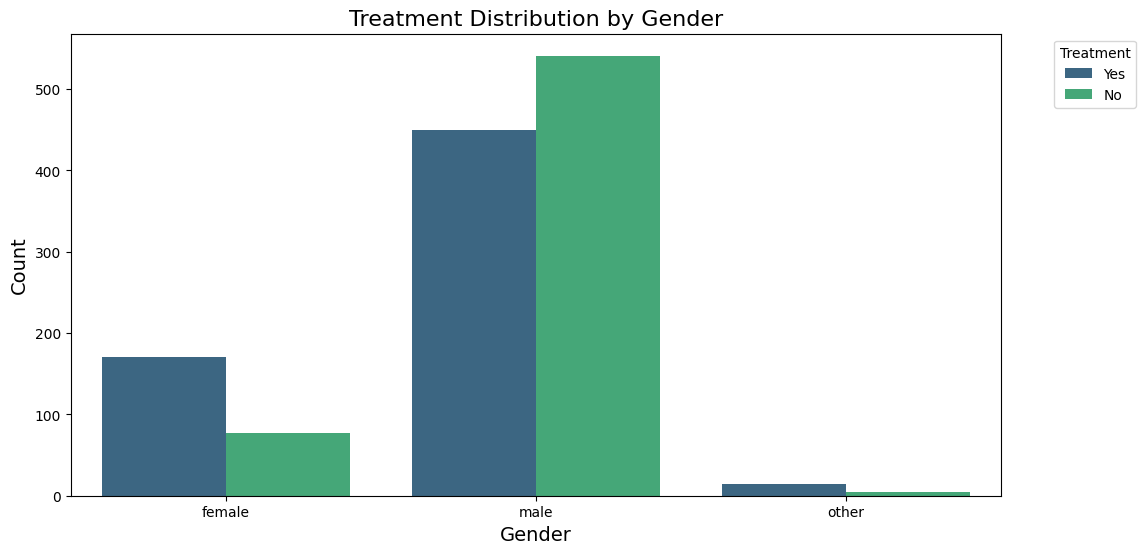

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='treatment', data=df, palette='viridis')
plt.title('Treatment Distribution by Gender', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Count', size=14)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

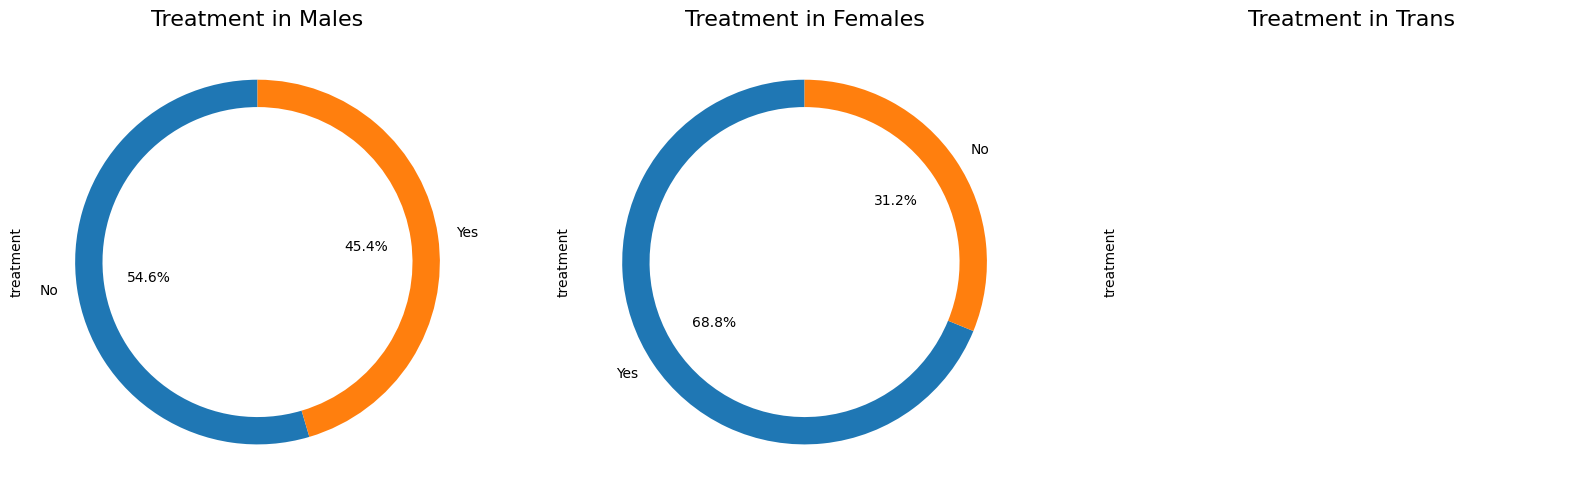

In [ ]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['treatment'][df['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
df['treatment'][df['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
df['treatment'][df['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

In [ ]:
df['work_interfere'].value_counts()

Sometimes    729
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64

<ipython-input-58-1c19038cf21d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Sometimes'], palette='viridis')
<ipython-input-58-1c19038cf21d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Never'], palette='viridis')
<ipython-input-58-1c19038cf21d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Rarely'], palette='viridis')
<ipython-input-58-1c19038cf21d>:16: FutureWarning: 

Passing `pa

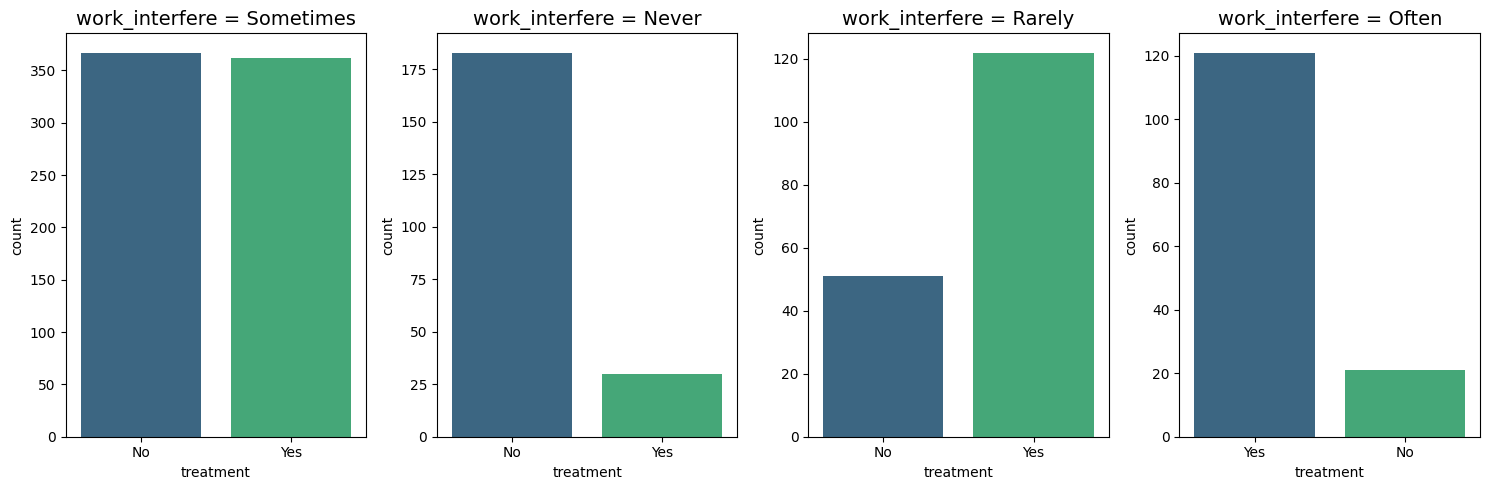

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Sometimes'], palette='viridis')
plt.title('work_interfere = Sometimes', size=14)

plt.subplot(1, 4, 2)
sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Never'], palette='viridis')
plt.title('work_interfere = Never', size=14)

plt.subplot(1, 4, 3)
sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Rarely'], palette='viridis')
plt.title('work_interfere = Rarely', size=14)

plt.subplot(1, 4, 4)
sns.countplot(x='treatment', data=df[df['work_interfere'] == 'Often'], palette='viridis')
plt.title('work_interfere = Often', size=14)

plt.tight_layout()
plt.show()

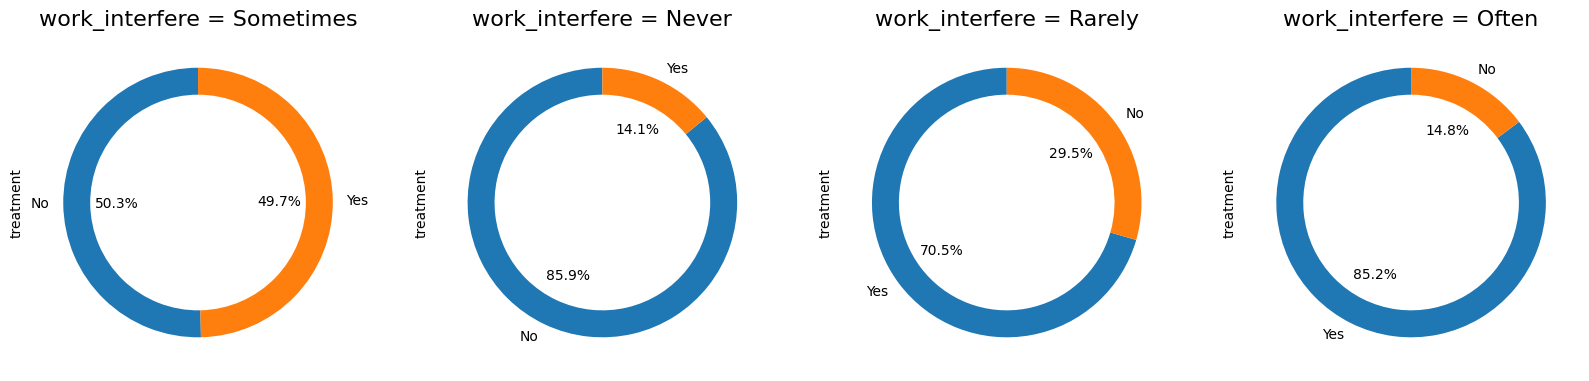

In [ ]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
df['treatment'][df['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
df['treatment'][df['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
df['treatment'][df['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
df['treatment'][df['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()


In [ ]:
df['family_history'].value_counts()

No     767
Yes    490
Name: family_history, dtype: int64

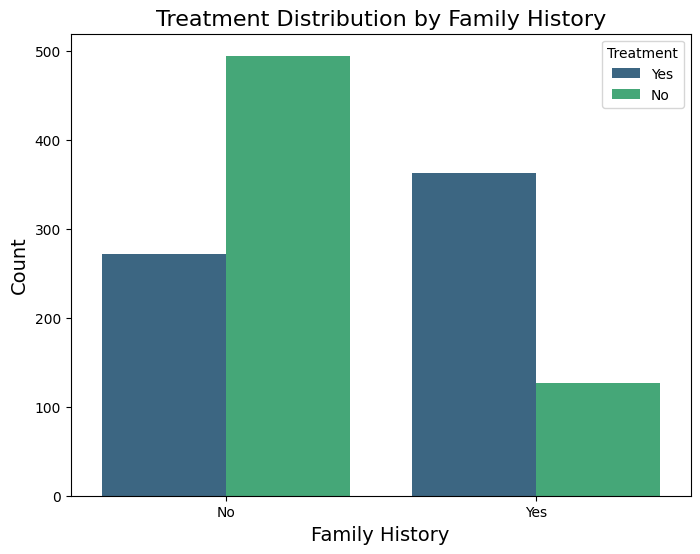

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='treatment', data=df, palette='viridis')
plt.title('Treatment Distribution by Family History', size=16)
plt.xlabel('Family History', size=14)
plt.ylabel('Count', size=14)
plt.legend(title='Treatment')
plt.show()

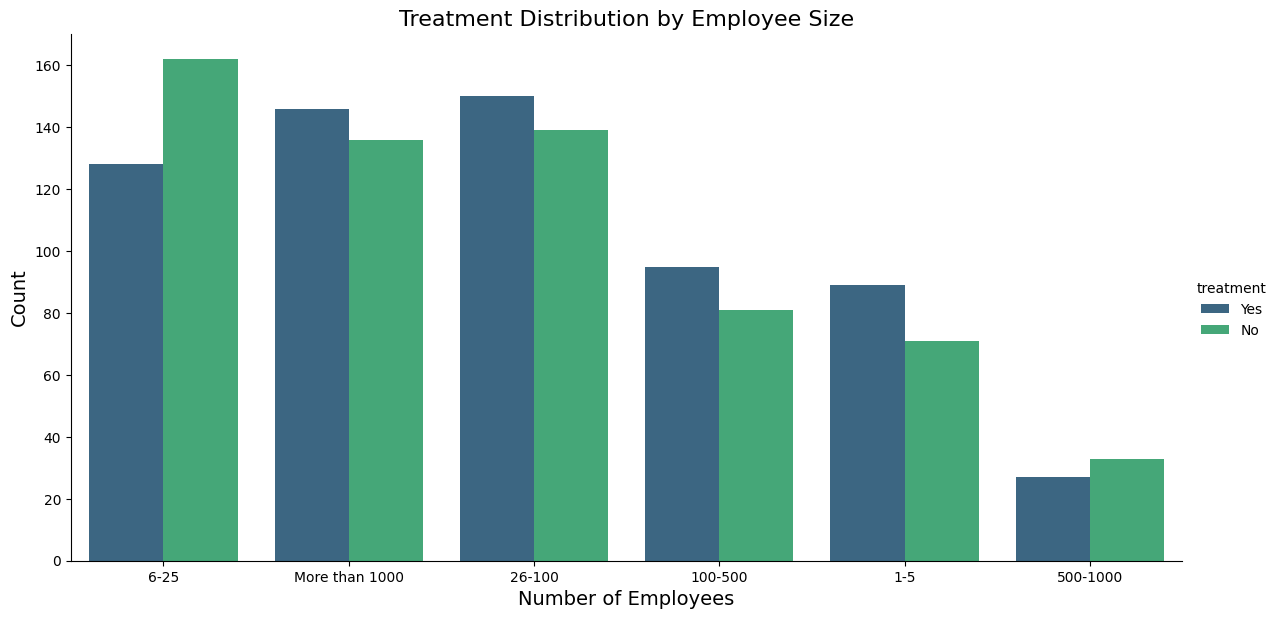

In [ ]:
sns.catplot(x='no_employees', hue='treatment', data=df, kind='count', palette='viridis', height=6, aspect=2)
plt.title('Treatment Distribution by Employee Size', size=16)
plt.xlabel('Number of Employees', size=14)
plt.ylabel('Count', size=14)
plt.show()

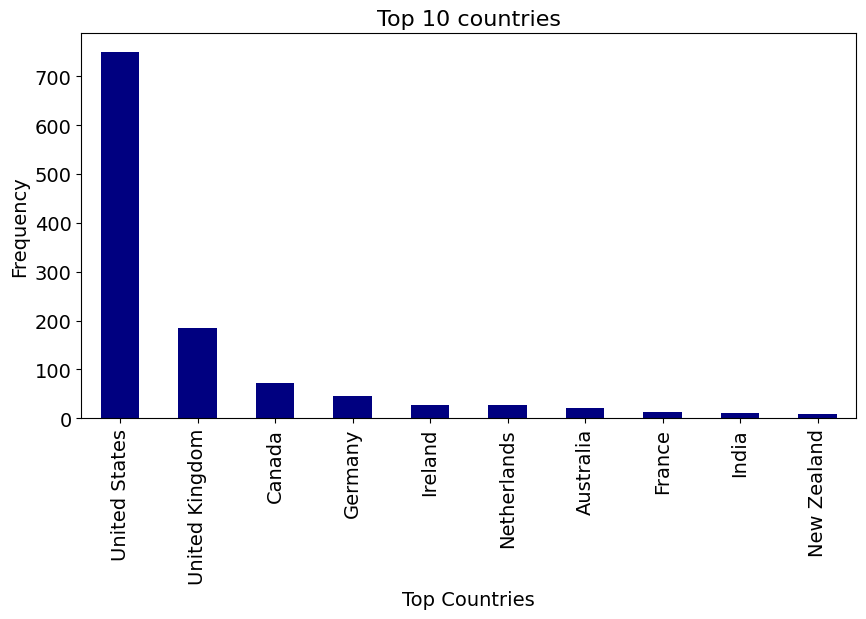

In [ ]:
fig = plt.figure(figsize=[10,5])

df['Country'].value_counts().head(10).plot.bar(color='navy')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()

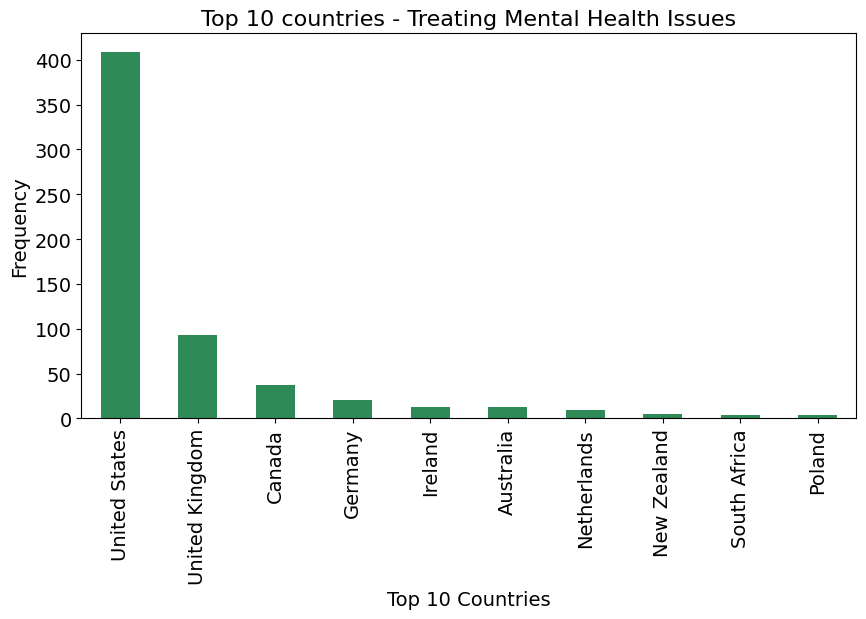

In [ ]:
fig = plt.figure(figsize=[10,5])

df[df['treatment']== 'Yes']['Country'].value_counts().head(10).plot.bar(color='seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Treating Mental Health Issues', size=16)

plt.show()

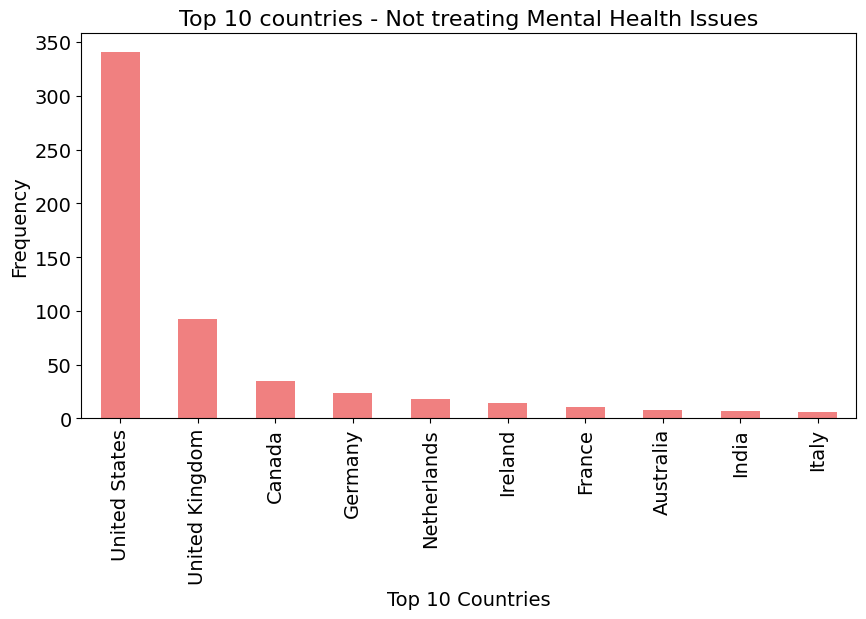

In [ ]:
fig = plt.figure(figsize=[10,5])

df[df['treatment']== 'No']['Country'].value_counts().head(10).plot.bar(color='lightcoral')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Not treating Mental Health Issues', size=16)

plt.show()

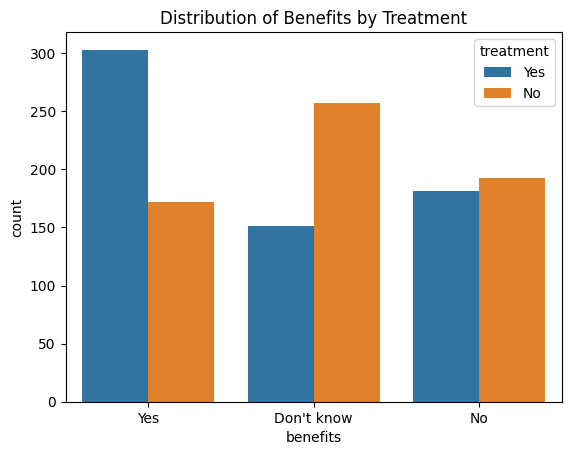

In [ ]:
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title('Distribution of Benefits by Treatment')
plt.show()

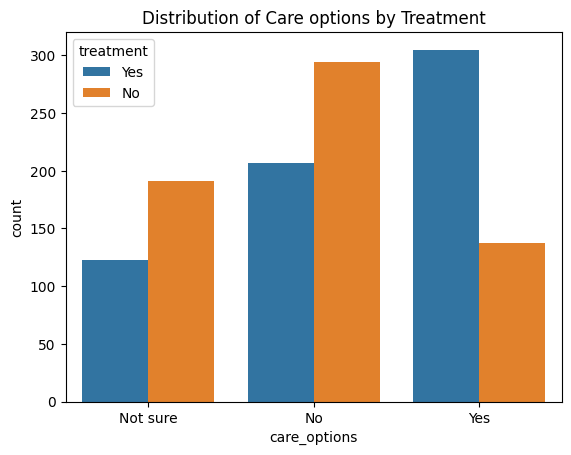

In [ ]:
sns.countplot(x='care_options', hue='treatment', data=df)
plt.title('Distribution of Care options by Treatment')
plt.show()


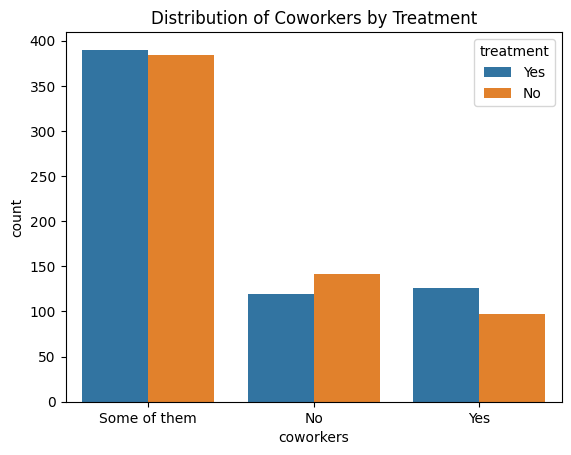

In [ ]:
sns.countplot(x='coworkers', hue='treatment', data=df)
plt.title('Distribution of Coworkers by Treatment')
plt.show()

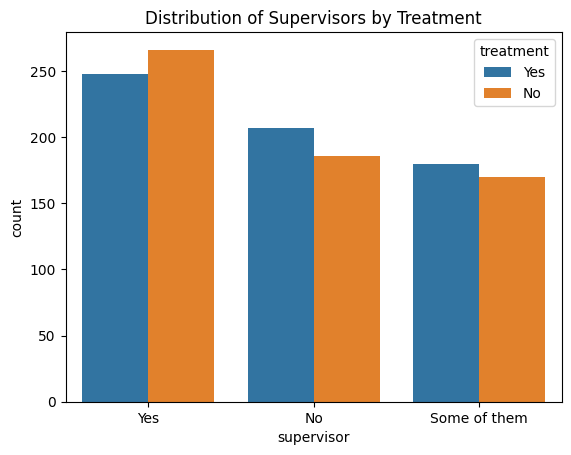

In [ ]:
sns.countplot(x='supervisor', hue='treatment', data=df)
plt.title('Distribution of Supervisors by Treatment')
plt.show()

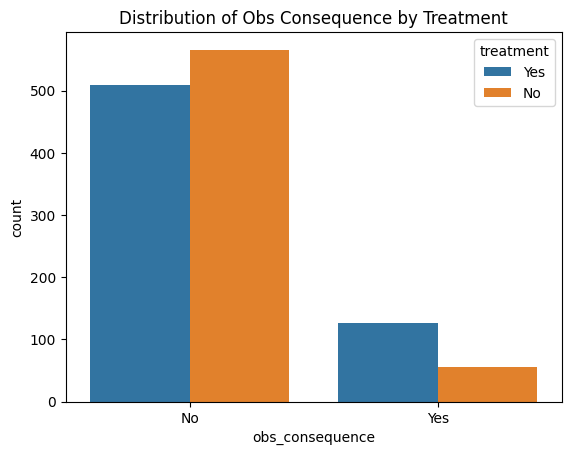

In [ ]:
sns.countplot(x='obs_consequence', hue='treatment', data=df)
plt.title('Distribution of Obs Consequence by Treatment')
plt.show()

In [ ]:
df_copy = df.copy()

# Use LabelEncoder to change the Dtypes to 'int'
le = LabelEncoder()

# Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Timestamp','Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                     'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                     'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                     'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                     'mental_vs_physical', 'obs_consequence']

# Write a Loop for fitting LabelEncoder on columns_to_encode
for column in columns_to_encode:
    df_copy[column] = le.fit_transform(df_copy[column])

# Now, 'df_copy' has the transformed values


In [ ]:
df_copy

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,0,44,0,0,1,1,4,0,...,2,2,1,1,1,2,1,0,2,0
1,1,44,1,44,0,0,0,2,5,0,...,0,0,0,1,0,0,1,1,0,0
2,2,32,1,6,0,0,0,2,4,0,...,0,1,1,1,2,2,2,2,1,0
3,3,31,1,43,0,1,1,1,2,0,...,1,1,2,2,1,0,0,0,1,1
4,4,31,1,44,0,0,0,0,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1239,26,1,43,0,0,1,3,2,0,...,0,2,1,1,1,1,1,1,0,0
1255,1240,32,1,44,0,1,1,1,2,1,...,2,1,1,1,1,2,1,1,2,0
1256,1241,34,1,44,0,1,1,3,5,0,...,0,1,2,2,0,0,1,1,1,0
1257,1242,46,0,44,0,0,0,3,1,1,...,0,0,2,1,0,0,1,1,1,0


In [ ]:
df_copy.describe()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,619.162291,32.071599,0.818616,36.834527,0.114558,0.389817,0.505171,2.128083,2.787589,0.297534,...,0.645187,1.406523,0.851233,0.829753,0.970565,1.096261,0.868735,0.715990,0.813047,0.144789
std,359.014006,7.271222,0.422915,13.237348,0.318615,0.487903,0.500172,1.164215,1.738082,0.457355,...,0.907222,1.506162,0.767150,0.485102,0.619425,0.844310,0.425446,0.722483,0.833736,0.352028
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.000000,27.000000,1.000000,41.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,618.000000,31.000000,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,929.000000,36.000000,1.000000,44.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,1243.000000,72.000000,2.000000,46.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
print("\nMissing Values:")
print(df_copy.isnull().sum())


Missing Values:
Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


## Pearson Correlation

In [ ]:
df_corr= df_copy.corr()

In [ ]:
# Show correlation values in stacked format
def rank_correlation_score (df_copy):

    # Stacked correlation map into 3-columns format
    stacked_corr = df_copy.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})

    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']

    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(df_copy)
stacked_df_corr

<ipython-input-76-0acbf4ba635c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names


,Feature_1,Feature_2,Pearson_Correlation
495,coworkers,supervisor,0.573265
339,wellness_program,seek_help,0.464558
287,benefits,care_options,0.440048
289,benefits,seek_help,0.377231
131,family_history,treatment,0.376714
...,...,...,...
317,care_options,mental_health_consequence,0.001467
194,work_interfere,coworkers,0.000816
95,Country,supervisor,0.000714
59,Gender,remote_work,0.000668


                                       Correlation Matrix                                       


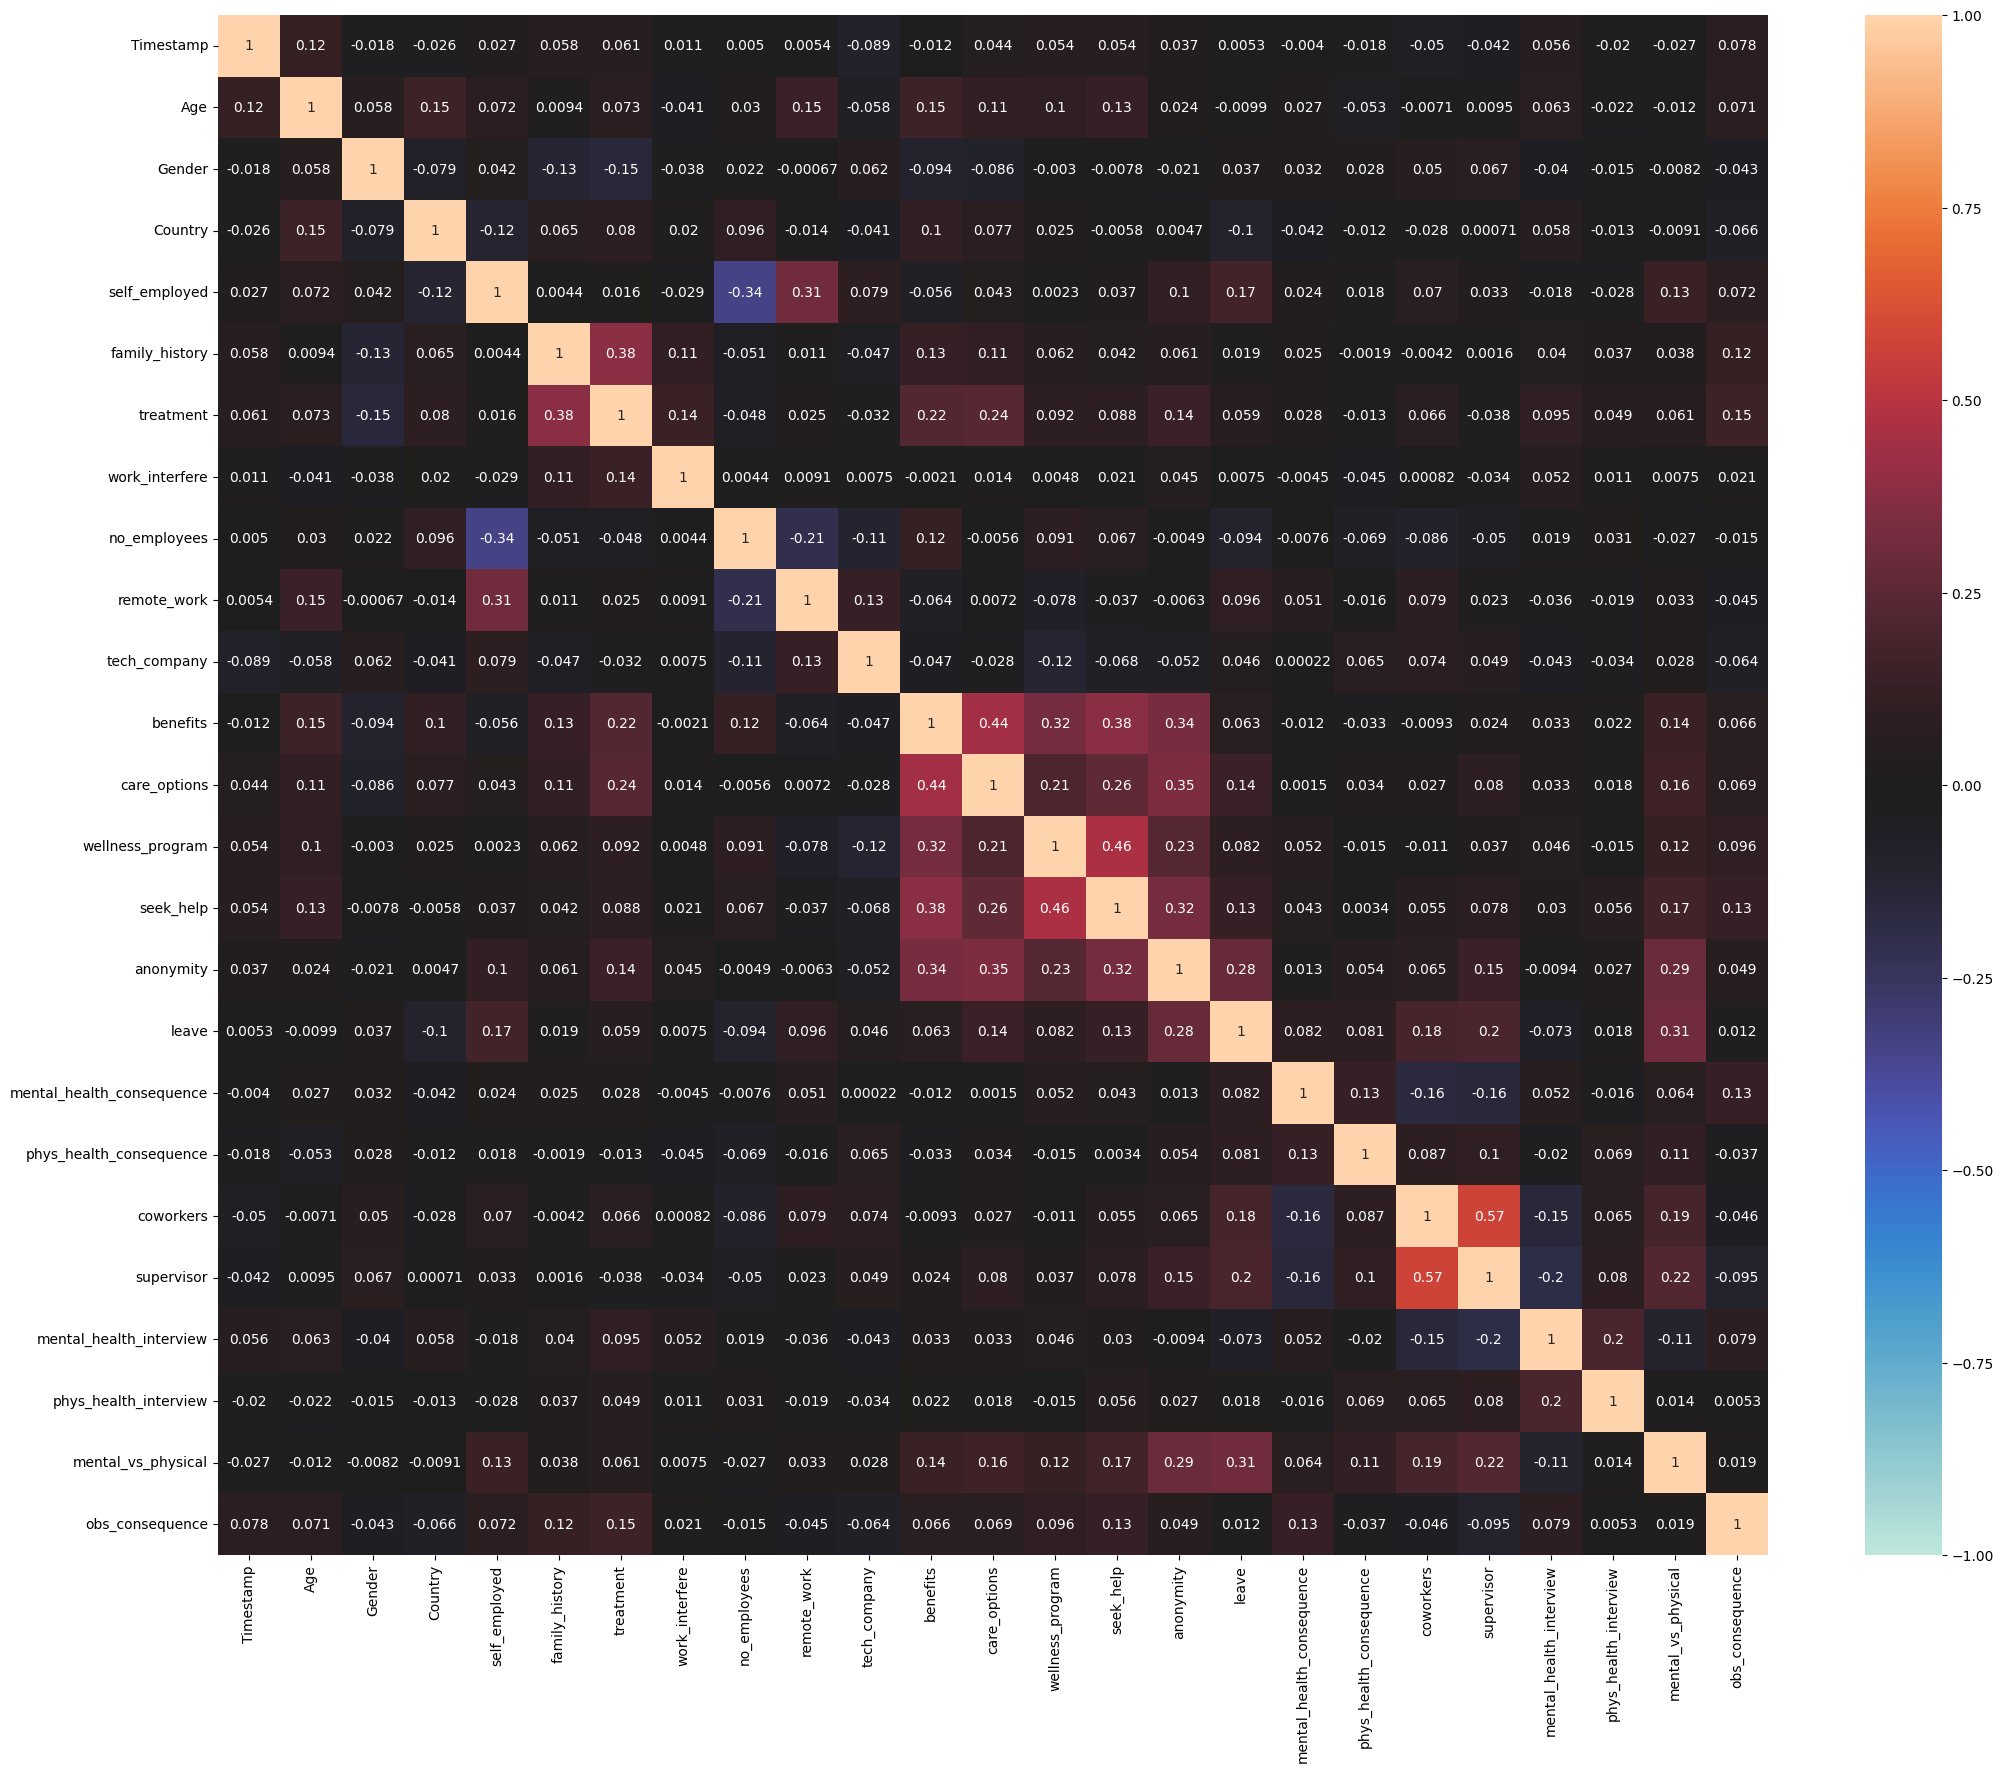

In [ ]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df_copy.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

Since the correlation is not that big there is no need to filter out the data

In [ ]:
correlation_matrix = df_copy.corr()

# Display the correlation matrix
print(correlation_matrix)

                           Timestamp       Age    Gender   Country  \
Timestamp                   1.000000  0.118294 -0.018217 -0.026466   
Age                         0.118294  1.000000  0.057562  0.153582   
Gender                     -0.018217  0.057562  1.000000 -0.078608   
Country                    -0.026466  0.153582 -0.078608  1.000000   
self_employed               0.026684  0.072407  0.042066 -0.117261   
family_history              0.058369  0.009407 -0.127802  0.065099   
treatment                   0.060748  0.073455 -0.149882  0.080096   
work_interfere              0.010958 -0.040680 -0.038481  0.019613   
no_employees                0.004965  0.029680  0.022281  0.096334   
remote_work                 0.005364  0.146096 -0.000668 -0.014481   
tech_company               -0.089314 -0.057569  0.061751 -0.040524   
benefits                   -0.012003  0.154961 -0.094150  0.102219   
care_options                0.044055  0.107980 -0.086386  0.076554   
wellness_program    

In [ ]:
correlation_with_target = correlation_matrix['treatment'].sort_values(ascending=False)
print(correlation_with_target)

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
work_interfere               0.136273
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
Country                      0.080096
Age                          0.073455
coworkers                    0.066022
Timestamp                    0.060748
mental_vs_physical           0.060552
leave                        0.059034
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
Gender                      -0.149882
Name: treatment, dtype: float64


## Feature Selection

In [ ]:
X = df_copy.drop('treatment', axis=1)
y = df_copy['treatment']

# Create a logistic regression model
model = LogisticRegression()

# Create an RFE model with cross-validation
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Create a pipeline with scaling and RFE
pipeline = make_pipeline(StandardScaler(), rfecv)

# Fit the pipeline on the data
pipeline.fit(X, y)

# Get the selected features
selected_features = X.columns[rfecv.support_]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'coworkers', 'supervisor', 'obs_consequence'],
      dtype='object')


This code snippet is implementing Recursive Feature Elimination with Cross-Validation (RFECV) using logistic regression as the estimator.

Logistic regression is a common choice for binary classification tasks.

This code uses RFECV with logistic regression to iteratively select the most important features for predicting the 'treatment' variable in the dataset. The pipeline includes standard scaling of the features before applying RFECV, which helps in improving the stability and performance of some machine learning algorithms. The selected features are then printed for further analysis.

In [ ]:
# Features with higher positive correlations based on your previous information
selected_features = ['Gender', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'coworkers', 'supervisor', 'obs_consequence']

# Select features and target variable
X = df_copy[selected_features]
y = df_copy['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_selected = df_copy[selected_features]

In [ ]:
df_copy[selected_features]

,Gender,family_history,work_interfere,benefits,care_options,coworkers,supervisor,obs_consequence
0,0,0,1,2,1,1,2,0
1,1,0,2,0,0,0,0,0
2,1,0,2,1,0,2,2,0
3,1,1,1,1,2,1,0,1
4,1,0,0,2,0,1,2,0
...,...,...,...,...,...,...,...,...
1254,1,0,3,1,0,1,1,0
1255,1,1,1,2,2,1,2,0
1256,1,1,3,2,2,0,0,0
1257,0,0,3,1,2,0,0,0


## Split the data to train and test

In [ ]:
X = df_copy.drop('treatment', axis=1)
y = df_copy['treatment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training data, and X_test and y_test are your testing data


In [ ]:
X_train

,Timestamp,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
706,695,26,1,44,0,0,0,2,0,1,...,0,0,2,2,1,0,1,1,1,0
199,194,28,1,43,0,1,3,5,0,1,...,0,0,0,0,1,0,1,0,0,0
1014,1000,31,1,44,0,0,3,5,0,1,...,2,0,2,0,1,1,1,0,2,0
1159,1144,51,1,36,0,0,0,5,1,1,...,0,0,2,1,0,0,1,1,1,0
381,375,27,1,44,0,0,2,5,0,1,...,2,0,1,1,1,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1031,26,0,6,0,1,3,1,0,1,...,2,0,0,1,1,0,1,0,0,0
1096,1082,24,1,44,0,1,2,4,1,1,...,0,4,1,1,2,2,0,2,2,0
1132,1117,36,0,44,0,1,2,5,1,1,...,2,2,0,0,1,0,1,1,0,0
860,846,32,1,43,0,1,2,4,0,0,...,1,0,2,0,1,0,1,1,1,0


In [ ]:
y_train

706     0
199     1
1014    0
1159    0
381     1
       ..
1045    1
1096    1
1132    1
860     1
1128    0
Name: treatment, Length: 1005, dtype: int64

In [ ]:
X_test

,Timestamp,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
435,427,28,1,44,0,0,0,4,0,1,...,0,0,1,1,1,2,1,1,0,0
101,101,44,0,44,0,0,0,1,0,1,...,0,0,0,0,0,1,1,1,0,0
51,51,33,1,44,0,0,3,1,1,1,...,0,0,1,1,1,2,0,0,0,0
63,63,26,1,14,0,0,3,2,0,1,...,0,4,2,1,0,0,1,1,1,1
1073,1059,25,1,44,0,0,0,5,0,0,...,0,0,1,1,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,154,27,1,44,0,1,3,5,0,1,...,0,0,1,1,0,1,1,0,0,0
486,477,28,0,44,0,1,3,2,0,1,...,0,0,2,0,1,0,1,0,0,0
398,390,32,0,44,0,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
243,238,25,1,38,0,0,3,4,0,1,...,2,1,0,1,1,2,1,2,1,0


In [ ]:
y_test

435     0
101     0
51      0
63      0
1073    0
       ..
156     1
486     1
398     0
243     0
695     1
Name: treatment, Length: 252, dtype: int64

Top 25 Important Features:
                      Feature  Importance
0                   Timestamp    0.111045
6              work_interfere    0.101188
5              family_history    0.098762
1                         Age    0.093065
11               care_options    0.063632
7                no_employees    0.047871
3                     Country    0.047518
15                      leave    0.040829
10                   benefits    0.039322
16  mental_health_consequence    0.032386
19                 supervisor    0.032121
18                  coworkers    0.030639
13                  seek_help    0.029184
21      phys_health_interview    0.028365
2                      Gender    0.028332
22         mental_vs_physical    0.026901
12           wellness_program    0.023976
14                  anonymity    0.020556
17    phys_health_consequence    0.020137
8                 remote_work    0.020086
23            obs_consequence    0.018196
20    mental_health_interview    0.017768
9      

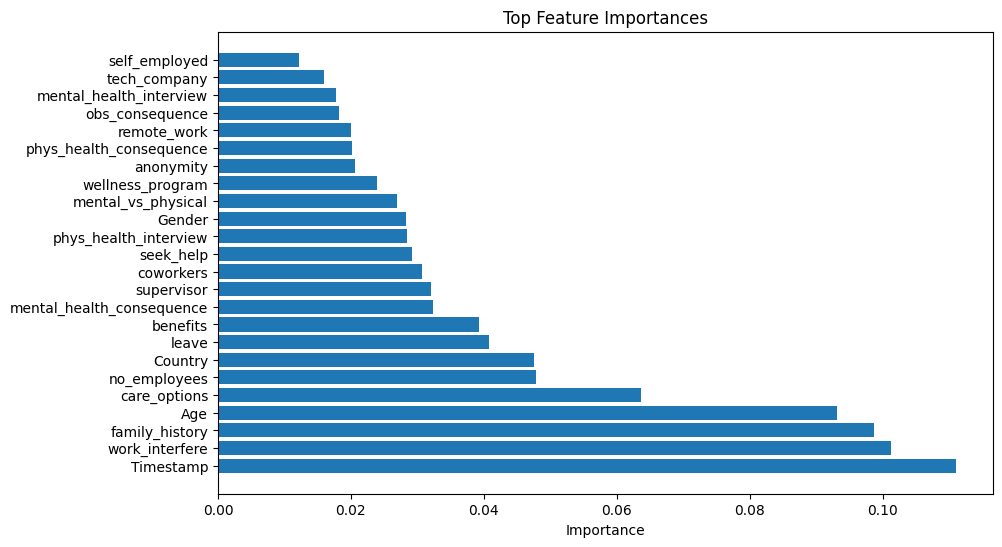

In [ ]:
X = df_copy.drop('treatment', axis=1)
y = df_copy['treatment']

# Initialize a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
top_n_features =25 # You can change this value based on your preference
print(f"Top {top_n_features} Important Features:")
print(feature_importance_df.head(top_n_features))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n_features], feature_importance_df['Importance'][:top_n_features])
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.show()

### Random forest

In [ ]:
# Select the top N important features
selected_features = feature_importance_df['Feature'][:top_n_features]

# Create a new DataFrame with only the selected features and the target variable
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)

Accuracy with Selected Features: 0.7579365079365079


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate additional metrics
print("Classification Report for Random forest:")
print(classification_report(y_test, y_pred_selected))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix:")
print(conf_matrix_rf)


Classification Report for Random forest:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       120
           1       0.77      0.77      0.77       132

    accuracy                           0.76       252
   macro avg       0.76      0.76      0.76       252
weighted avg       0.76      0.76      0.76       252

Confusion Matrix:
[[ 89  31]
 [ 30 102]]


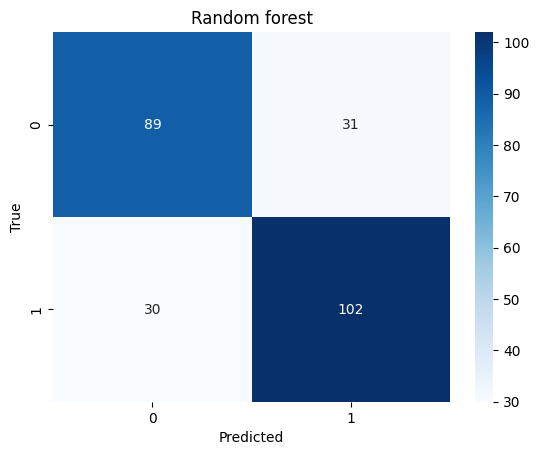

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Confusion Matrix Heatmap
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random forest')
plt.show()

### Logistic Regression

In [ ]:
# Select the top N important features
selected_features = feature_importance_df['Feature'][:top_n_features]

# Create a new DataFrame with only the selected features and the target variable
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model with selected features
logreg_model_selected = LogisticRegression()
logreg_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = logreg_model_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features (Logistic Regression):", accuracy_selected)

Accuracy with Selected Features (Logistic Regression): 0.7182539682539683


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_selected = logreg_model_selected.predict(X_test_selected)

# Evaluate additional metrics for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_selected))

# Confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       120
           1       0.73      0.73      0.73       132

    accuracy                           0.72       252
   macro avg       0.72      0.72      0.72       252
weighted avg       0.72      0.72      0.72       252

Confusion Matrix for Logistic Regression:
[[84 36]
 [35 97]]


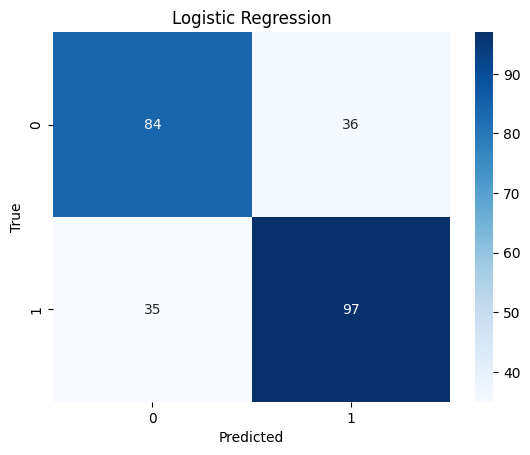

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Confusion Matrix Heatmap
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Assume X_train_selected, X_test_selected, y_train, and y_test are already defined

# Initialize and train the SVM model with selected features
svm_model_selected = SVC(random_state=42)
svm_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected_svm = svm_model_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected_svm = accuracy_score(y_test, y_pred_selected_svm)
print("Accuracy with Selected Features (SVM):", accuracy_selected_svm)

Accuracy with Selected Features (SVM): 0.5238095238095238


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set for SVM
y_pred_selected_svm = svm_model_selected.predict(X_test_selected)

# Evaluate additional metrics for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_selected_svm))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_selected_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.50      0.84      0.63       120
           1       0.62      0.23      0.34       132

    accuracy                           0.52       252
   macro avg       0.56      0.54      0.48       252
weighted avg       0.56      0.52      0.48       252

Confusion Matrix for SVM:
[[101  19]
 [101  31]]


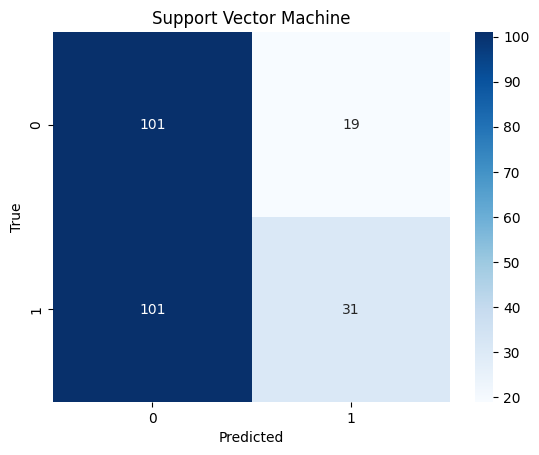

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Confusion Matrix Heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Support Vector Machine')
plt.show()